In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time

## Low Trigger Threshold - Abalone at 0 V and SiPM2

In [2]:
data = psu.read_file('/data/abalone/2020_12_15/Abalone0_SiPM2_t15.dat')

/data/abalone/2020_12_15/Abalone0_SiPM2_t15.dat Number of events 359073.0


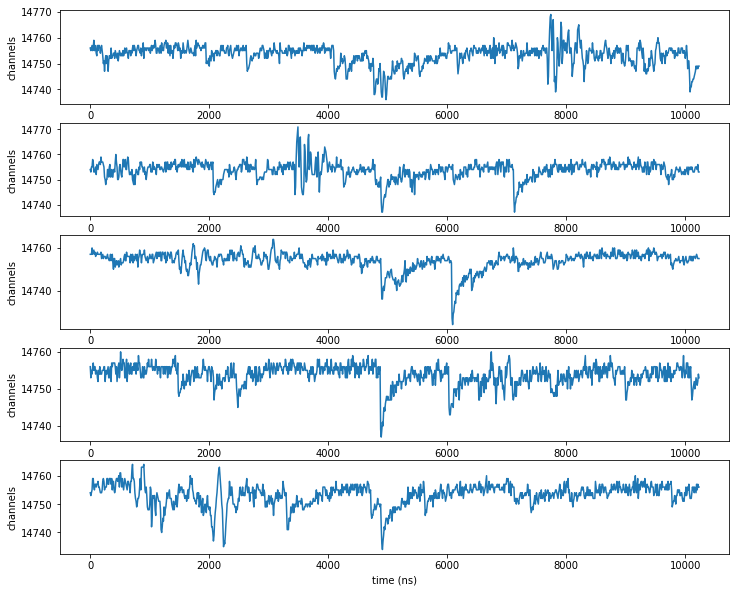

In [3]:
psu.plot_waveforms2( data, events = 5)

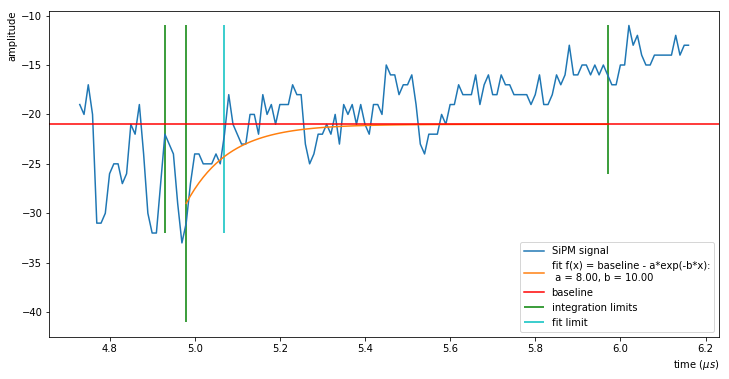

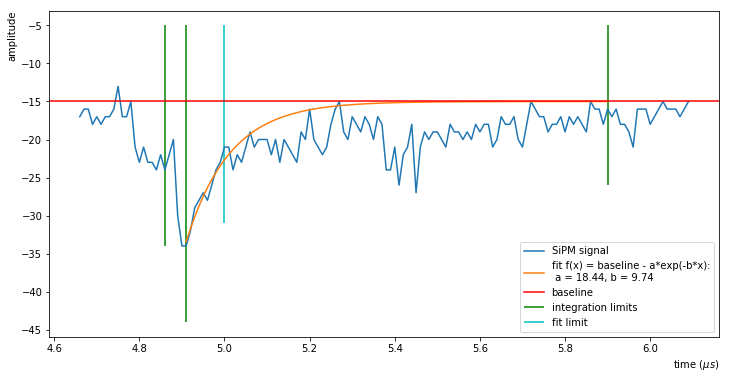

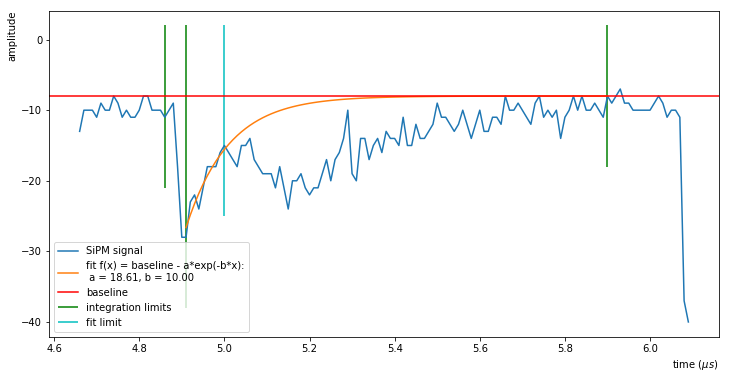

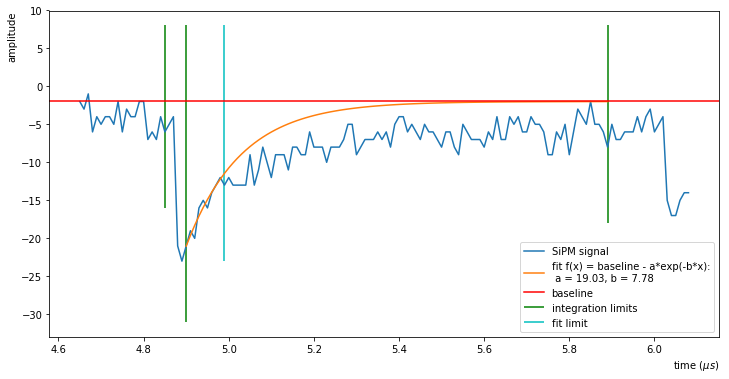

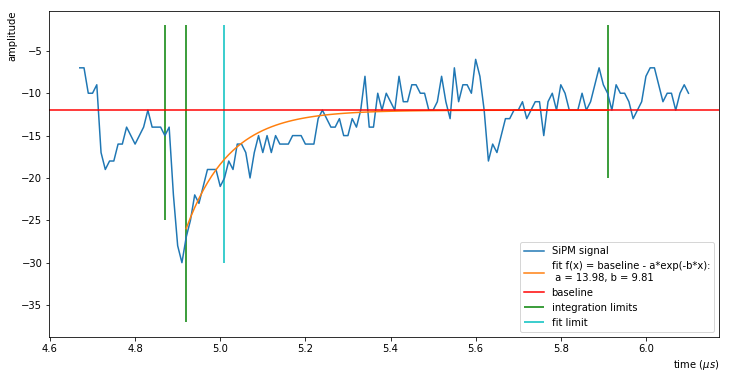

In [4]:
for i in range(5):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data[i], 4, ampllim = 10, plot = False)
    psu.integral_central_peak(data[i],listpeaks, dtl=-4, dtr=1, tfit=10,
                              tlim=100,tc=2,tll=8,tlr=10,plot=True)

In [5]:
def plot_spectrum(peakint, bins = 500, range=(1,10), log = False):
    h, t = np.histogram(peakint, bins=bins, range=range)
    #peaks, _ = find_peaks(h, height=hlim, width=5, distance=15)
    plt.figure(figsize=(12,6))
    plt.plot(t[:bins], h, '-', label = f'Abalone at 0 V with SiPM-2')
    #plt.plot(t[peaks], h[peaks], "x")
    plt.xlabel(r'area ($ADC\times \mu$s)',ha='right',x=1,fontsize=12)
    plt.ylabel('number of events',ha='right',y=1,fontsize=12)
    if (log): plt.yscale('log')
    plt.legend(fontsize=14)

/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/share/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


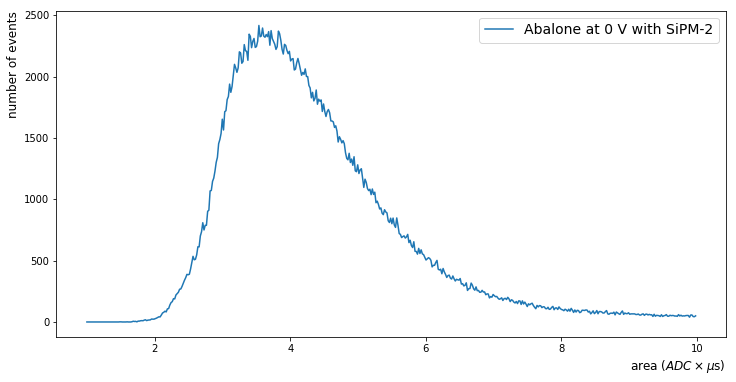

In [6]:
peakint15 = np.load(f'2020_12_15/peakint_Abalone0_SiPM2_t15.npy')
plot_spectrum(peakint15, bins = 500, range=(1,10))

## High Trigger Threshold - Abalone at 0 V and SiPM2

In [7]:
data2 = psu.read_file('/data/abalone/2020_12_15/Abalone0_SiPM2_t40.dat')

/data/abalone/2020_12_15/Abalone0_SiPM2_t40.dat Number of events 351728.0


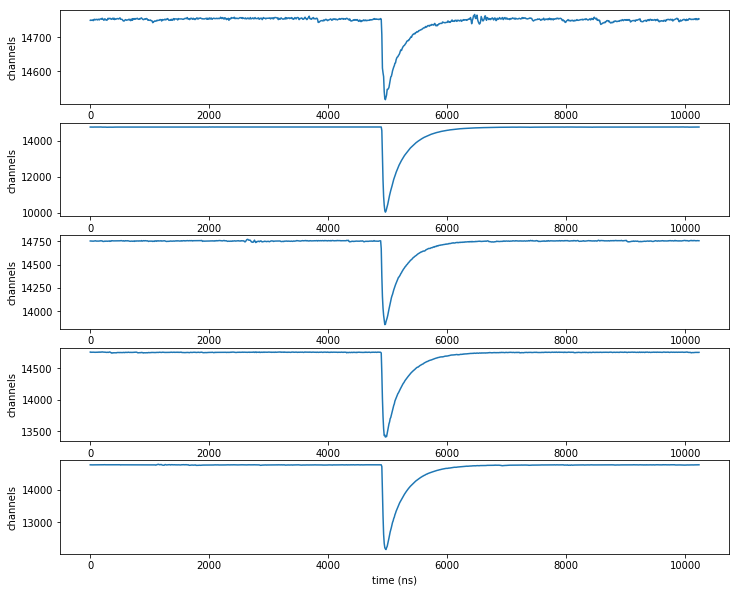

In [8]:
psu.plot_waveforms2( data2, events = 5)

0 area 80.66633697647293
1 area 1619.2345132974526
2 area 308.14510177883244
3 area 484.7691939324339
4 area 909.2379246469665


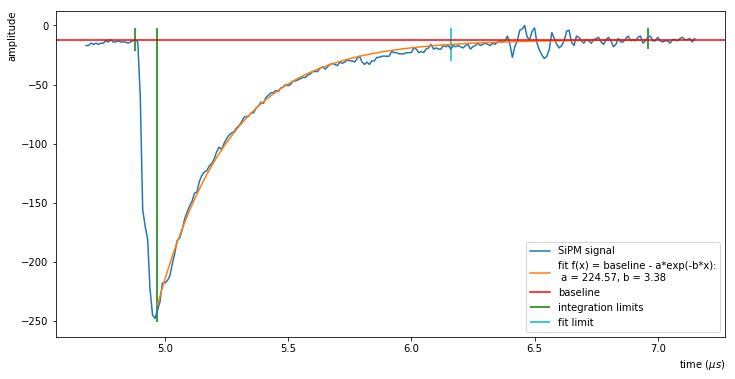

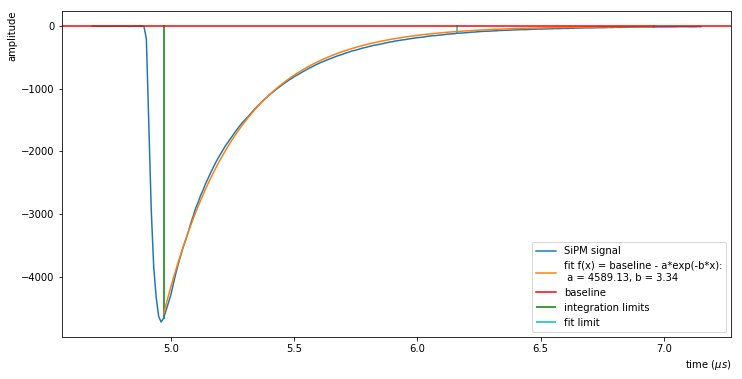

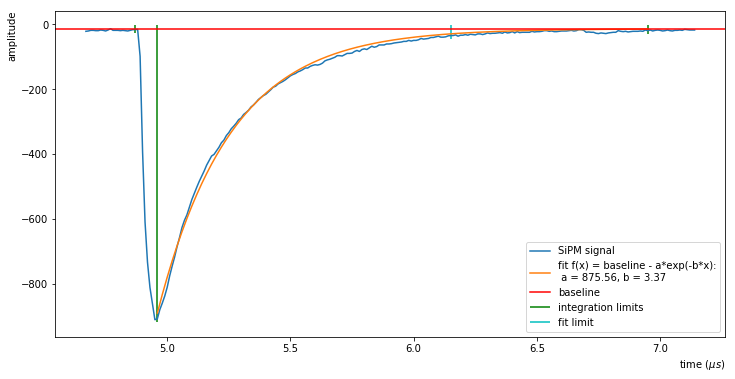

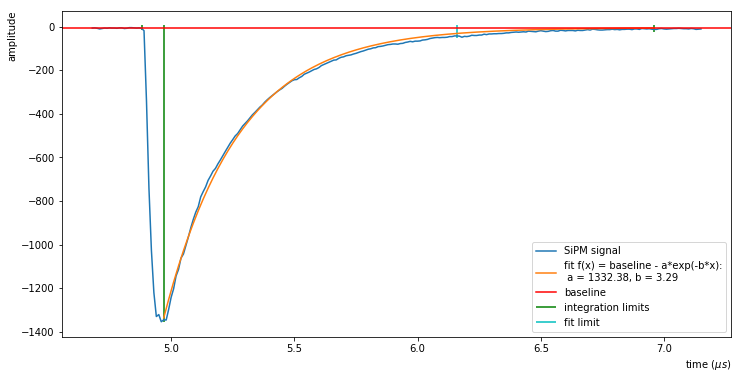

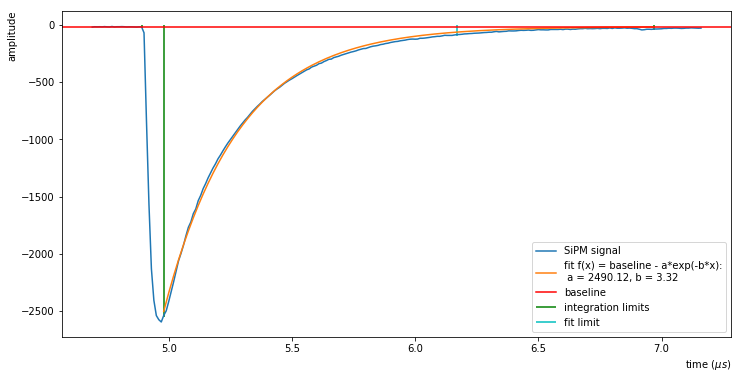

In [9]:
for i in range(5):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data2[i], 4, ampllim = 10, plot = False)
    a = psu.integral_central_peak(data2[i],listpeaks, dtl=-8, dtr=1, tfit=120,
                                  tlim=200,tc=2,tll=8,tlr=10,plot=True)
    print(i,'area',a)

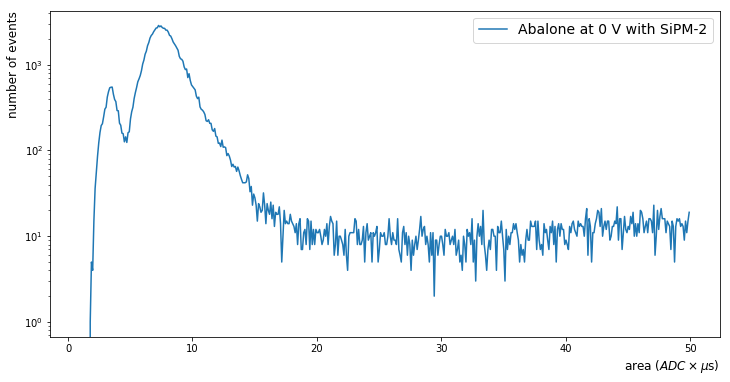

In [10]:
peakint40 = np.load(f'2020_12_15/peakint_Abalone0_SiPM2_t40.npy')
plot_spectrum(peakint40, bins = 500, range=(1,50), log = True)

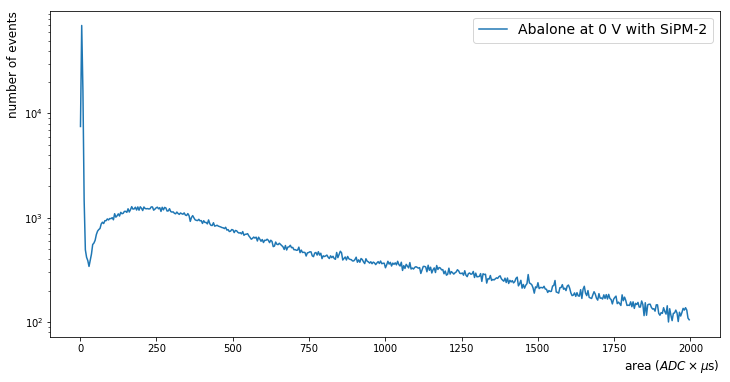

In [11]:
plot_spectrum(peakint40, bins = 500, range=(1,2000), log = True)

## NO Abalone and SiPM2

In [12]:
data3 = psu.read_file('/data/abalone/2020_12_17/noAbalone_SiPM2_t15.dat')

/data/abalone/2020_12_17/noAbalone_SiPM2_t15.dat Number of events 787602.0


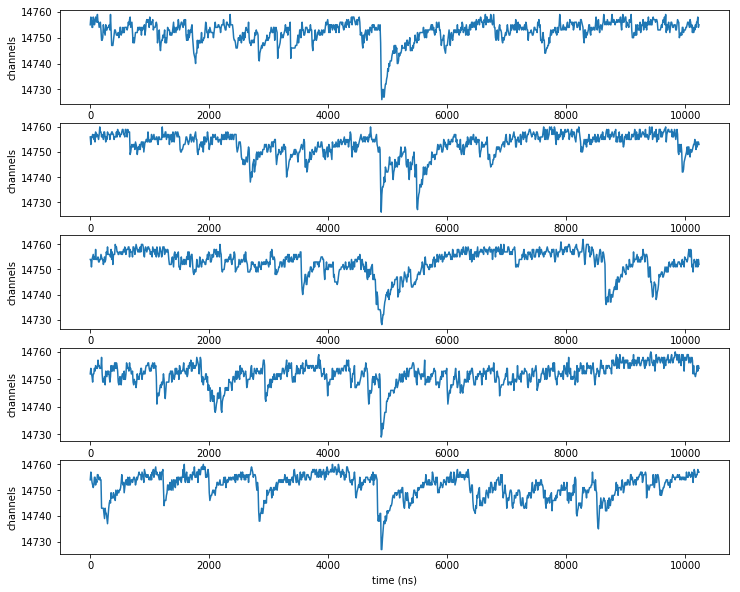

In [13]:
psu.plot_waveforms2( data3, events = 5)

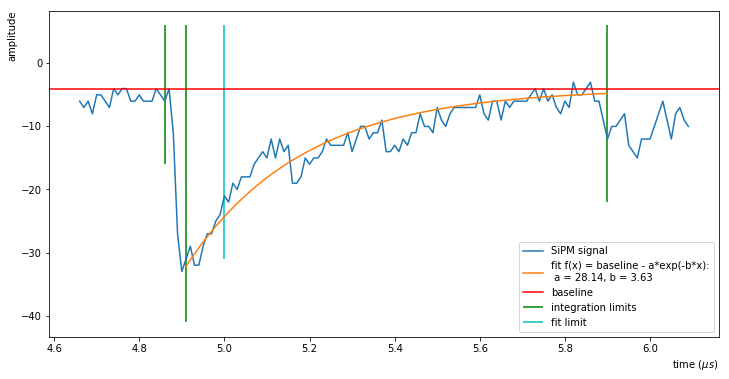

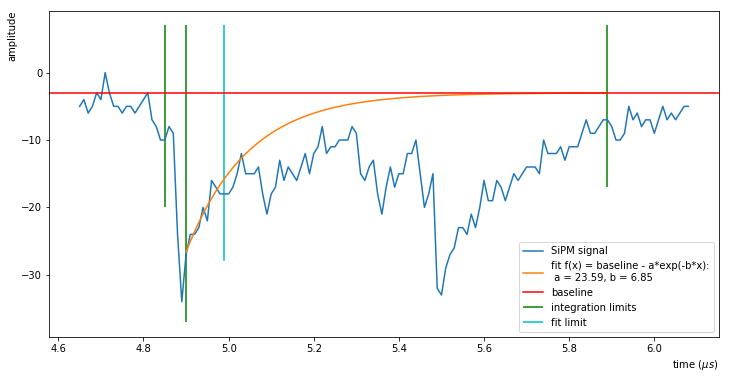

<Figure size 864x432 with 0 Axes>

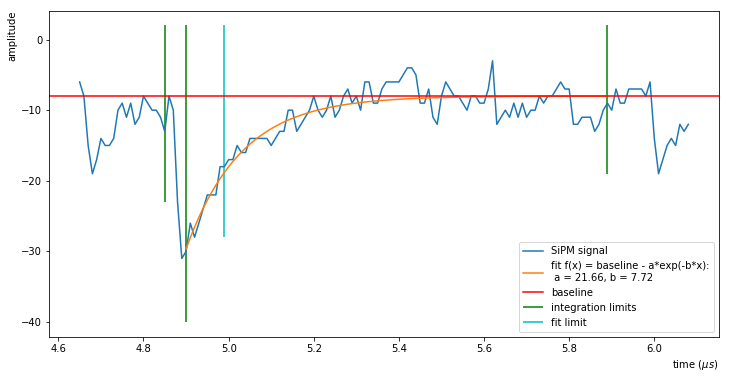

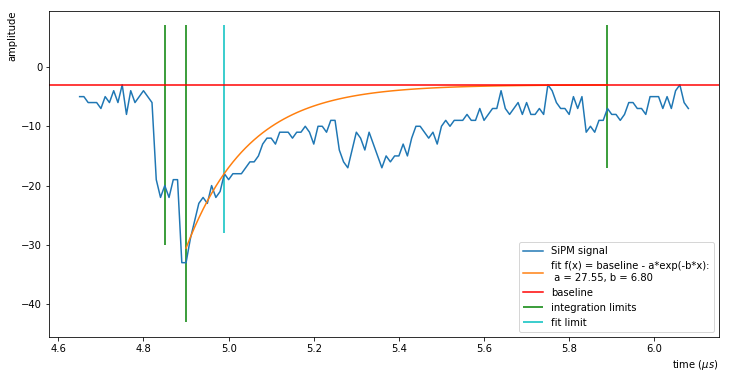

In [14]:
for i in range(5):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data3[i], 4, ampllim = 10, plot = False)
    psu.integral_central_peak(data3[i],listpeaks, dtl=-4, dtr=1, tfit=10,
                              tlim=100,tc=4,tll=8,tlr=10,plot=True)

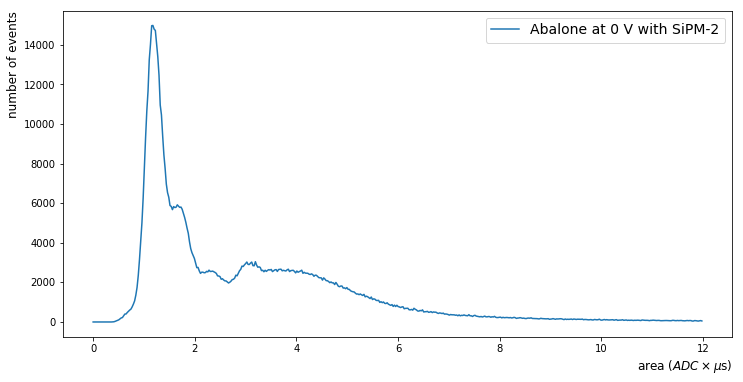

In [16]:
peak_no = np.load(f'2020_12_17/peakint_noAbalone_SiPM2_t15.npy')
plot_spectrum(peak_no, bins = 500, range=(0,12), log = False)

## Joern Abalone and SiPM2 - Low Trigger Threshould

In [15]:
data4 = psu.read_file('/data/abalone/2020_12_17/AbaloneJoern0_SiPM2_t15.dat')

/data/abalone/2020_12_17/AbaloneJoern0_SiPM2_t15.dat Number of events 360096.0


<Figure size 864x432 with 0 Axes>

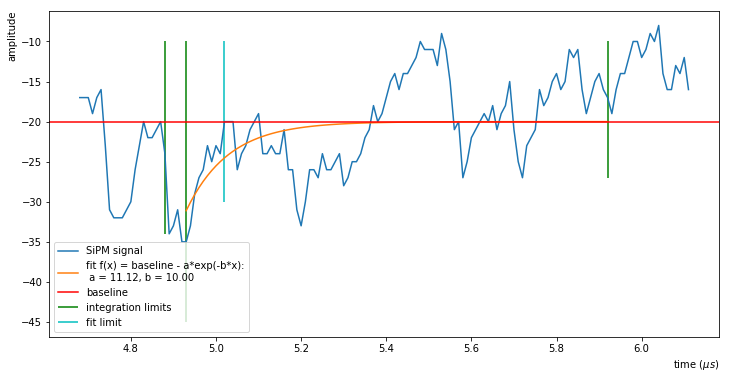

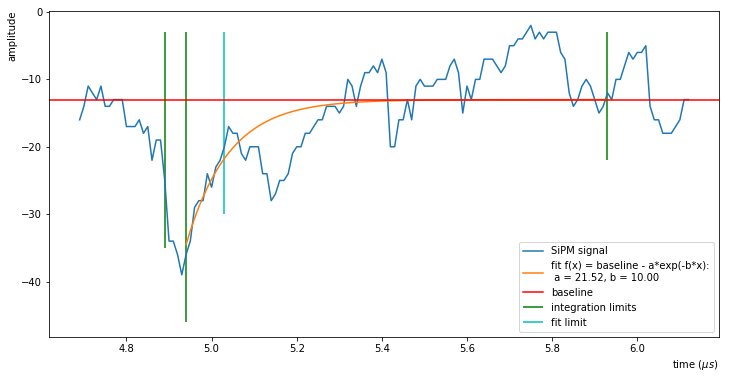

<Figure size 864x432 with 0 Axes>

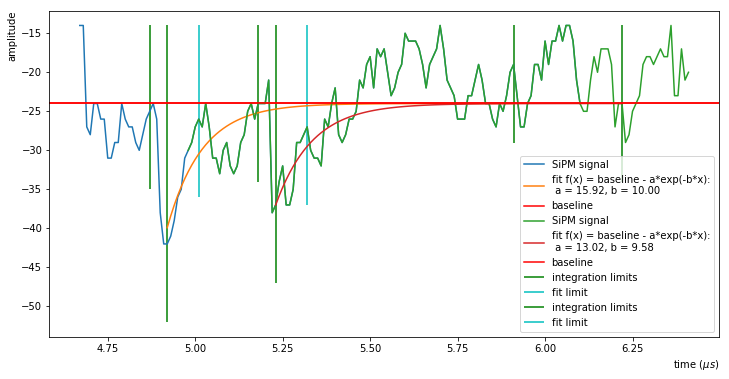

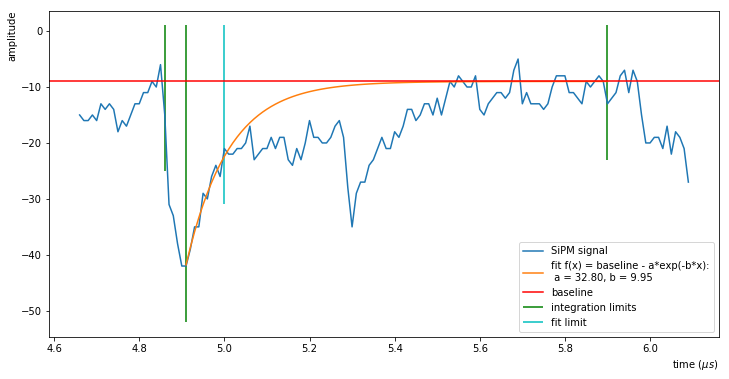

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

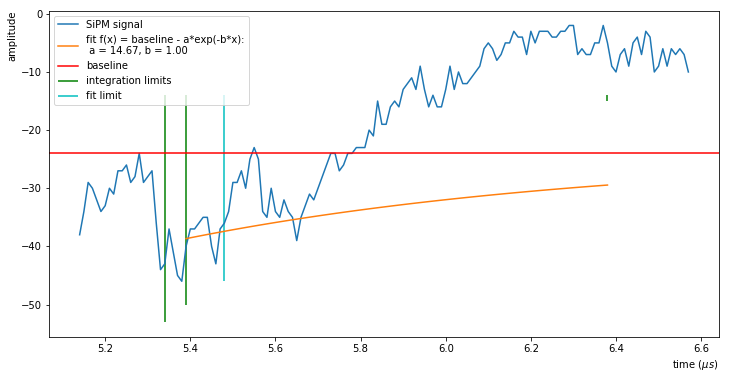

<Figure size 864x432 with 0 Axes>

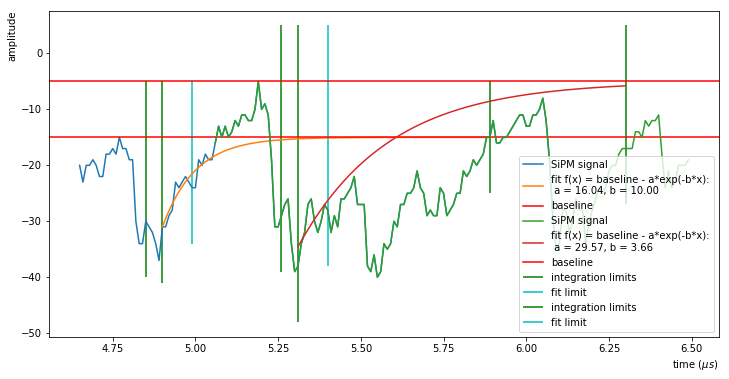

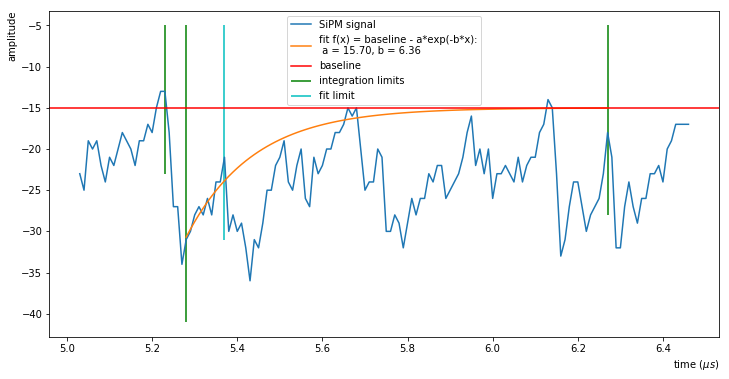

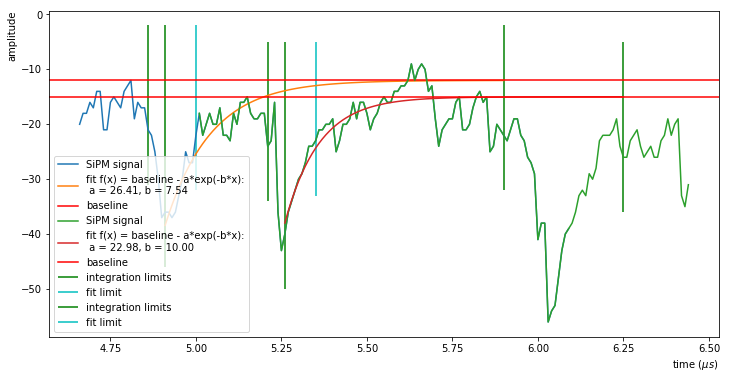

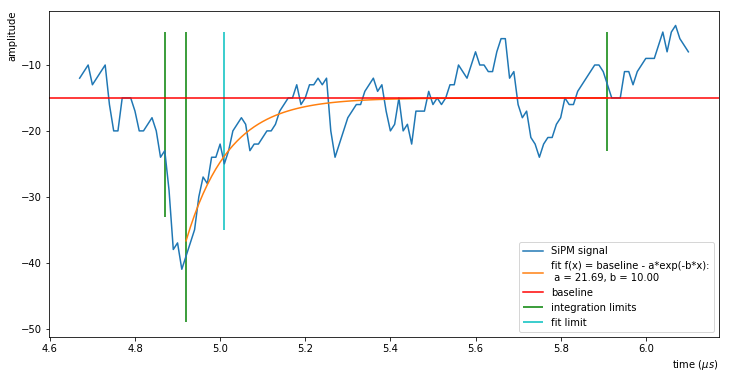

<Figure size 864x432 with 0 Axes>

In [16]:
for i in range(15):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data4[i], 4, ampllim = 10, plot = False)
    psu.integral_central_peak(data4[i],listpeaks, dtl=-4, dtr=1, tfit=10,
                              tlim=100,tc=4,tll=8,tlr=10,plot=True)

## Joern Abalone and SiPM2 - High Trigger Threshould

In [17]:
data5 = psu.read_file('/data/abalone/2020_12_17/AbaloneJoern0_SiPM2_t70.dat')

/data/abalone/2020_12_17/AbaloneJoern0_SiPM2_t70.dat Number of events 251629.0


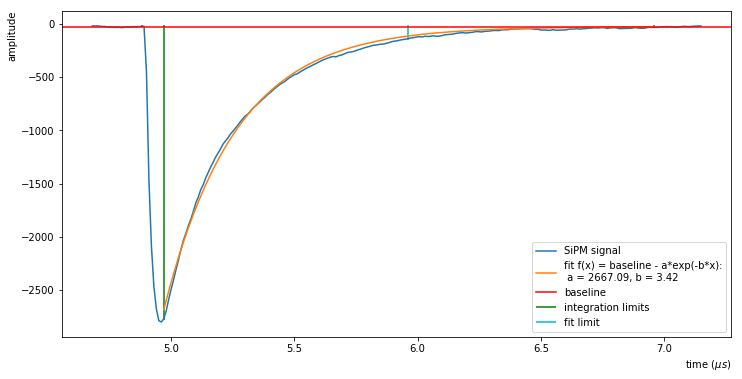

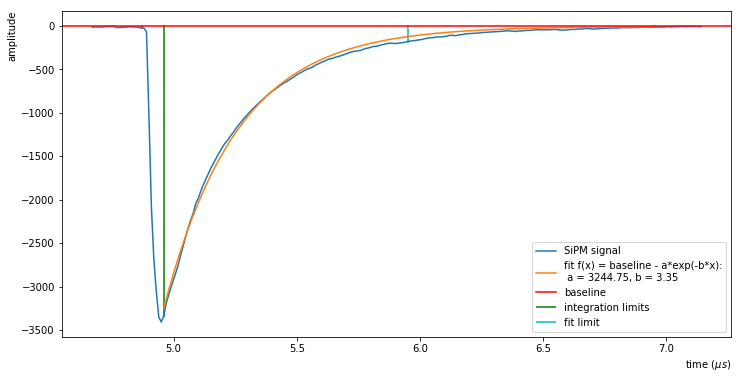

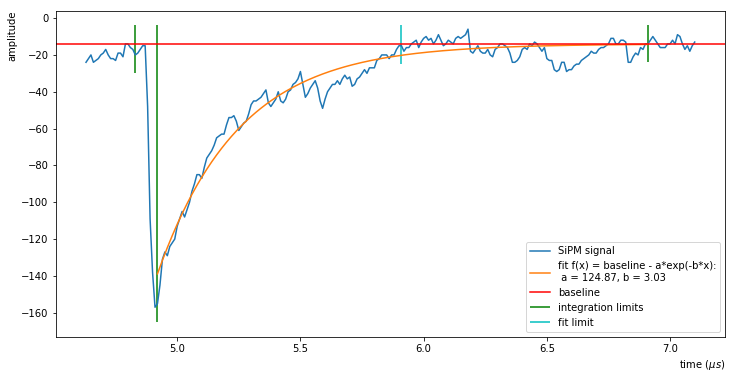

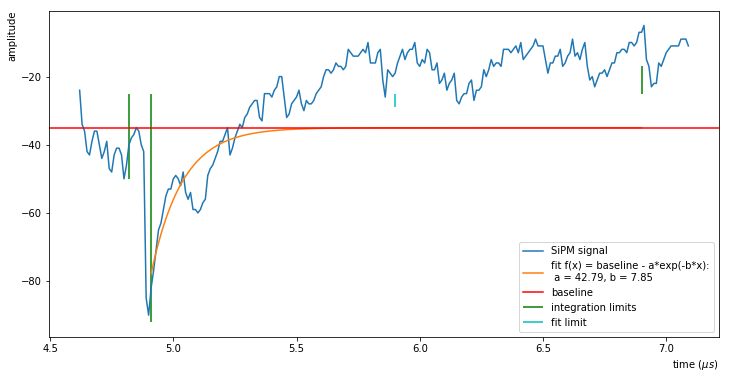

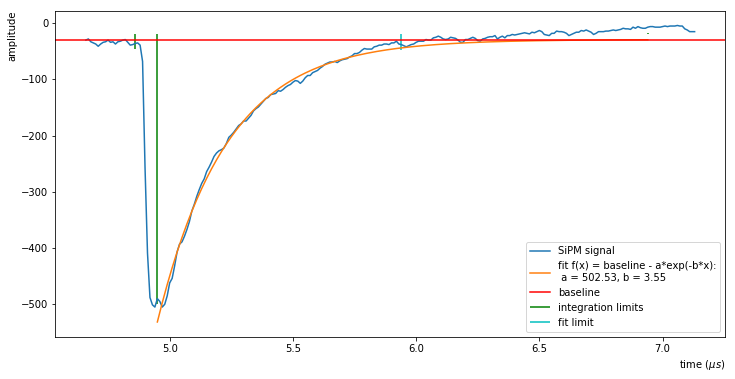

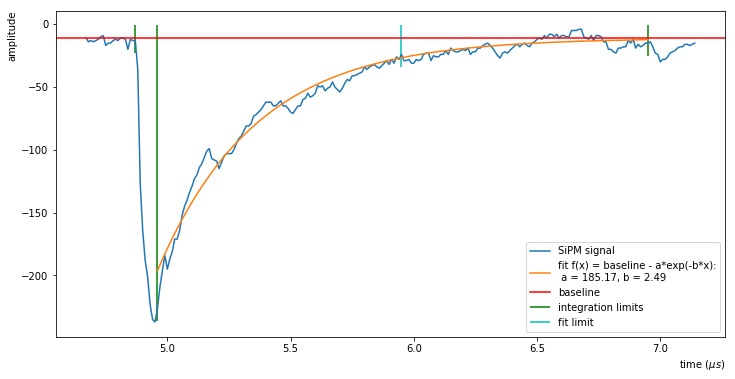

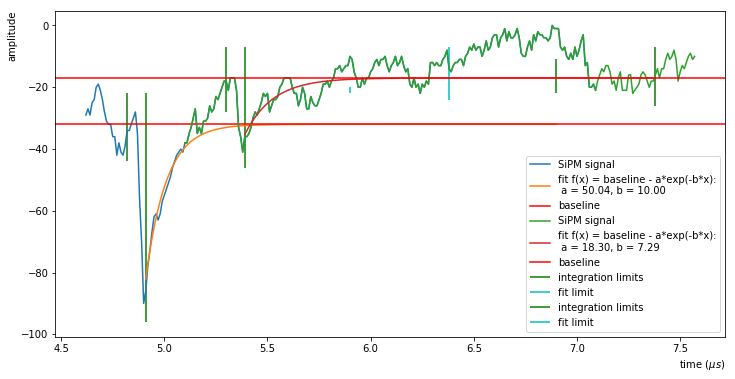

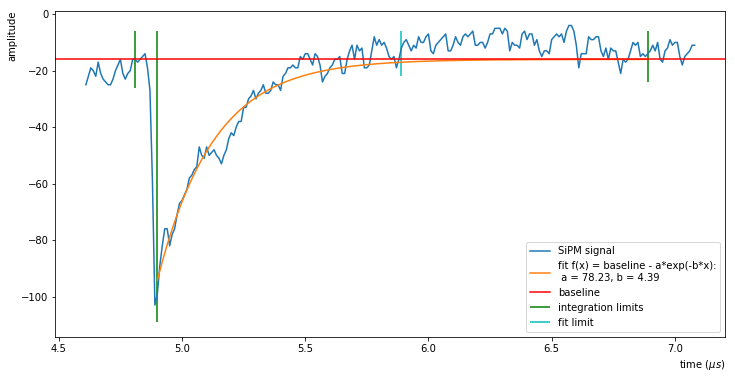

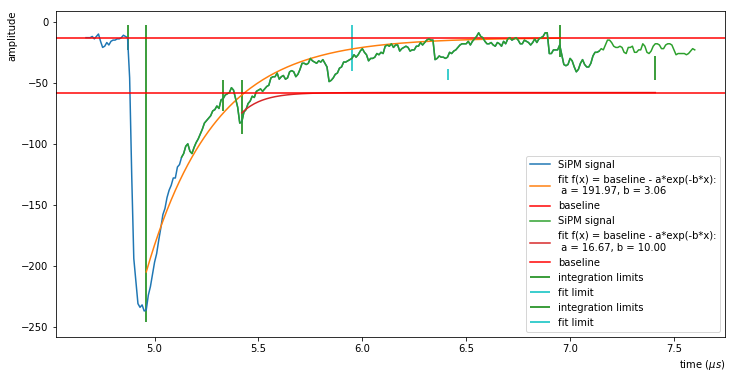

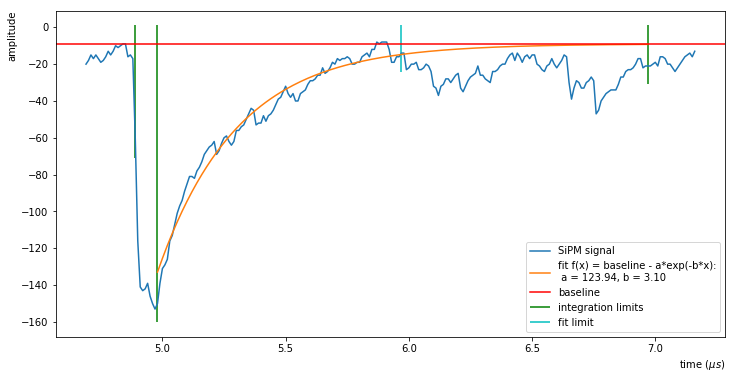

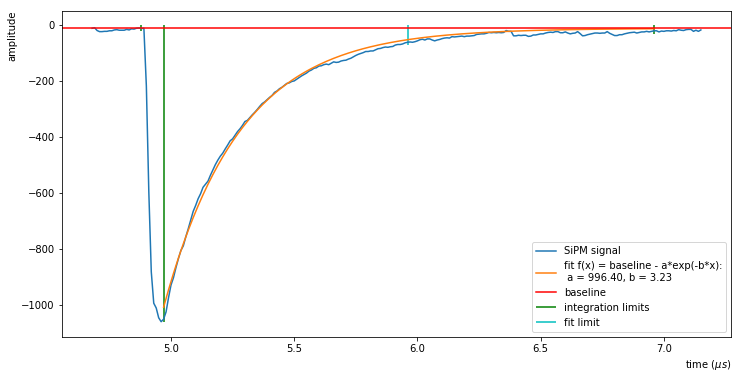

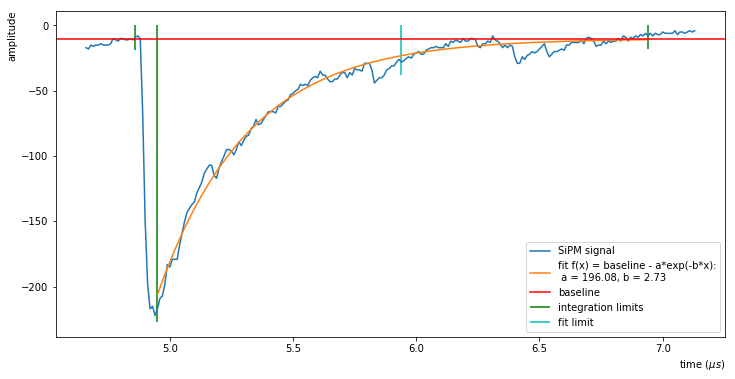

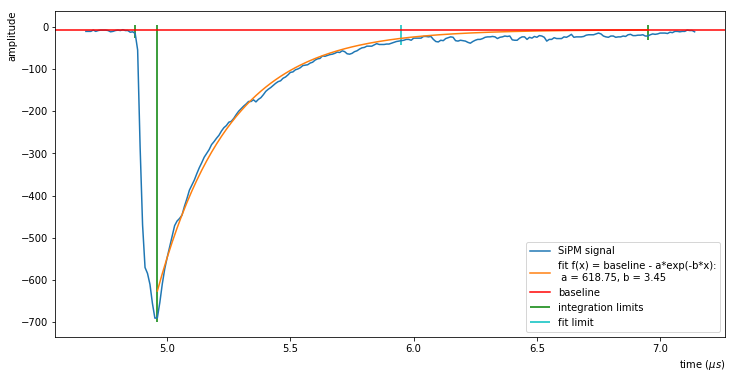

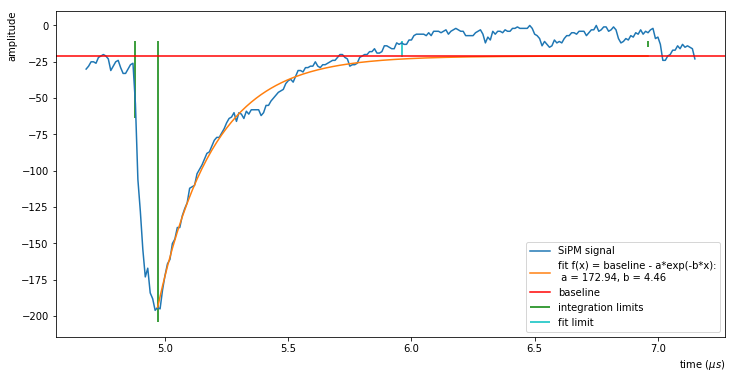

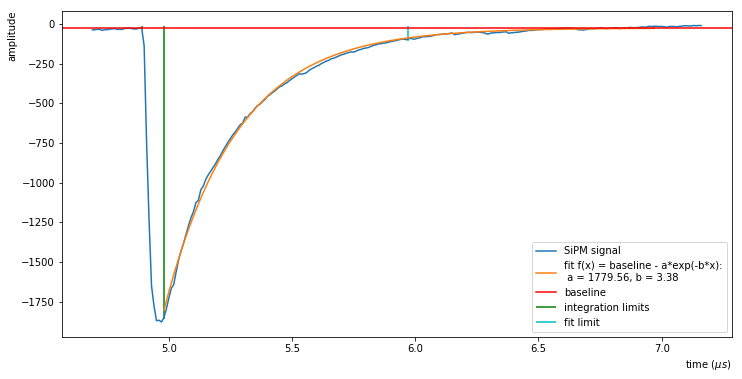

In [18]:
for i in range(15):
    plt.figure(figsize=(12,6))
    listpeaks = psu.search_peaks(data5[i], 4, ampllim = 10, plot = False)
    psu.integral_central_peak(data5[i],listpeaks, dtl=-8, dtr=1, tfit=100,
                              tlim=200,tc=4,tll=8,tlr=10,plot=True)

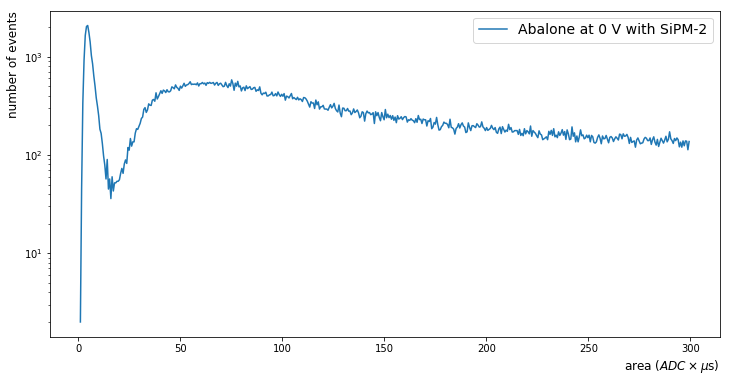

In [22]:
peakJoern70 = np.load(f'2020_12_17/peakint_AbaloneJoern0_SiPM2_t70.npy')
plot_spectrum(peakJoern70, bins = 500, range=(1,300), log = True)

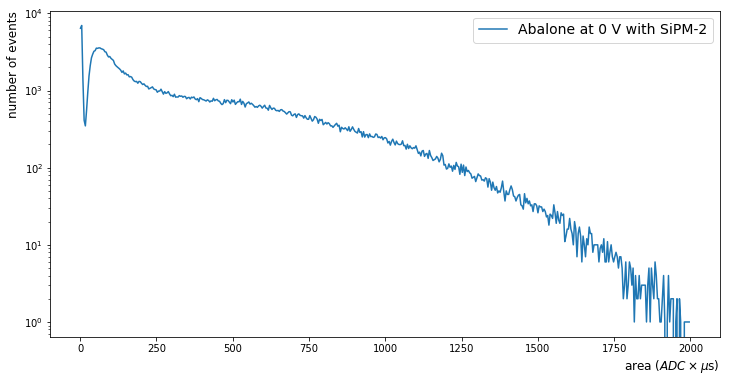

In [21]:
plot_spectrum(peakJoern70, bins = 500, range=(1,2000), log = True)